In [7]:
%pip install pandas matplotlib seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
CSV_PATH = 'taxonomy.csv'

# VIZ

In [18]:
SIZE = 17

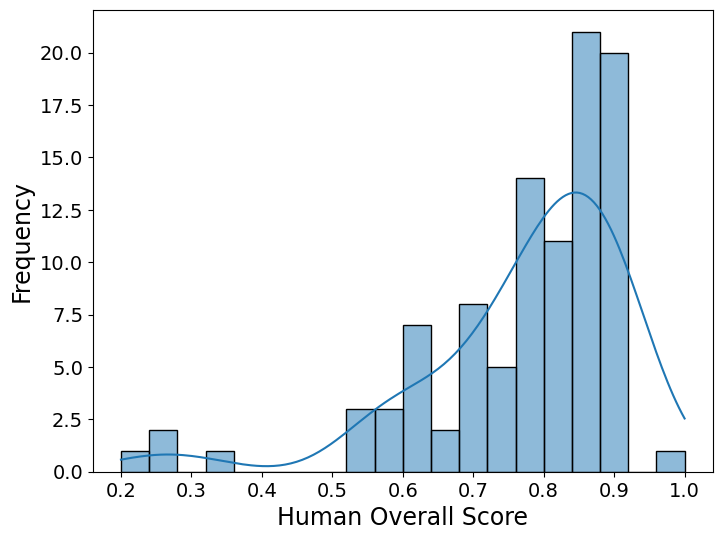

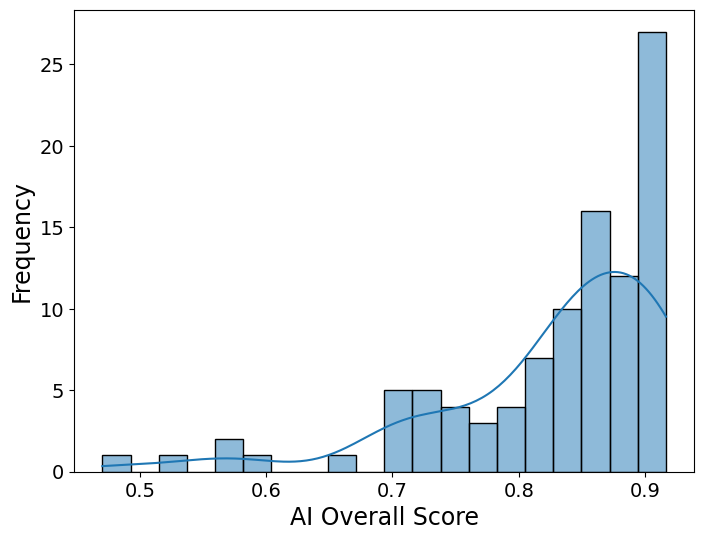

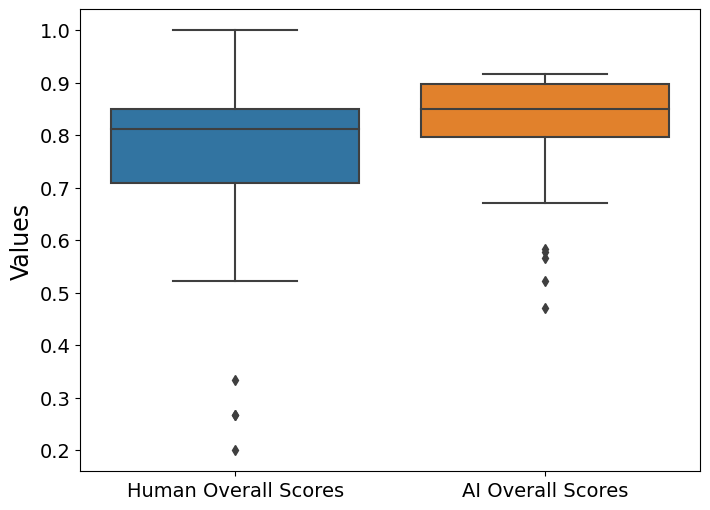

In [22]:
# Histogram of Human Overall Scores
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='human_overall', bins=20, kde=True, label='Human Overall Scores')
plt.xlabel('Human Overall Score', fontsize=SIZE)
plt.ylabel('Frequency', fontsize=SIZE)
plt.tick_params(axis='both', which='major', labelsize=SIZE-3)
plt.show()

# Histogram of AI Overall Scores
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='ai_overall', bins=20, kde=True, label='AI Overall Scores')
plt.xlabel('AI Overall Score', fontsize=SIZE)
plt.ylabel('Frequency', fontsize=SIZE)
plt.tick_params(axis='both', which='major', labelsize=SIZE-3)
plt.show()

# Box plots of Human Overall and AI Overall Scores
plt.figure(figsize=(8, 6))
bp = sns.boxplot(data=df[['human_overall', 'ai_overall']])
bp.set_xticklabels(['Human Overall Scores', 'AI Overall Scores'], fontsize=SIZE)
plt.ylabel('Values', fontsize=SIZE)
plt.tick_params(axis='both', which='major', labelsize=SIZE-3)
plt.show()
